In [4]:
import matplotlib.pyplot as plt

In [5]:
import scipy.optimize as opt

In [6]:
import numpy as np

In [7]:
k=0.176#0.158
b=-227.41#-147.36

In [12]:
(5**2*1.2/2)/k
b/k

-1292.1022727272727

In [31]:
def getd(file):
    d=[]
    for l in open(file):
        d.append(list(map(float,l[:-1].split())))
    return np.array(d)

dat=[]
for i in range(10):
    dat.append(getd(f'{i}0.txt'))
dat=np.array(dat)
#print(dat[:,:,0])
rho=1.2
dat[:,:,0]-=-b/k+140#+130
dat[:,:,0][dat[:,:,0]<0]=0
print(np.min(dat[:,:,0]))
dat[:,:,0]=np.sqrt(2*(dat[:,:,0]*k)/rho)

0.0


In [32]:
from scipy.signal import savgol_filter
for i in range(10):
    continue
    dat[i,:,0]=savgol_filter(dat[i,:,0],6,5)

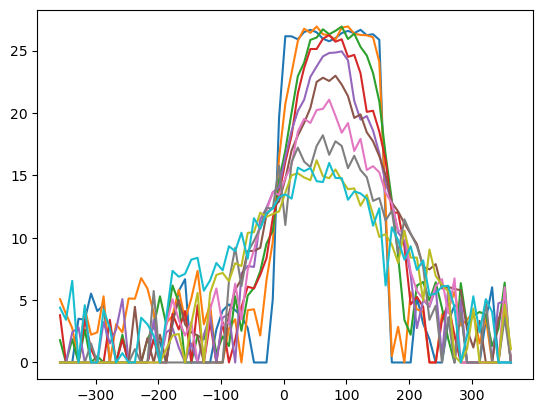

In [33]:
for i in range(10):
    plt.plot(dat[i,:,1],dat[i,:,0])

In [34]:
def func2(x,sig,x0):
    return np.exp(-((x-x0)/sig)**2/2)/(sig*np.sqrt(2*np.pi))
def func(x,a,b,c):
    return x*x*a+x*b+c
    
popt, pcov = opt.curve_fit(func, dat[0,:,1], dat[0,:,0])
popt

array([-1.36401488e-04,  9.77097742e-03,  1.35952531e+01])

In [35]:
import scipy
z=np.polyfit(dat[0,:,1], -dat[0,:,0], 10)
pl=np.poly1d(z)
m=scipy.optimize.minimize_scalar(pl,bounds=(-200,200), method='bounded')
m

 message: Solution found.
 success: True
  status: 0
     fun: -29.89081648394336
       x: 80.46264526092192
     nit: 10
    nfev: 10

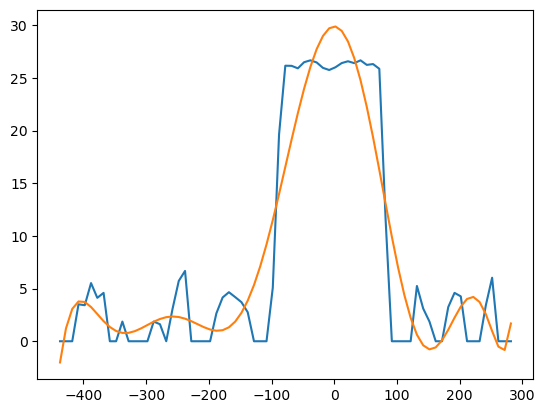

In [36]:
 plt.plot(dat[0,:,1]-m.x,dat[0,:,0])
 plt.plot(dat[i,:,1]-m.x,-pl(dat[i,:,1]))

In [51]:
for i in range(10):
    z=np.polyfit(dat[i,:,1], -dat[i,:,0], 10)
    pl=np.poly1d(z)
    m=scipy.optimize.minimize_scalar(pl,bounds=(-200,200), method='bounded')
    dat[i,:,1]-=m.x
    print(np.where(np.abs(dat[i,:,1])<10))
    for j in range(np.where(np.abs(dat[i,:,1])<10)[0][0]+2,dat[i,:,1].shape[0]):
        if dat[i,j-1,0]<0.15 or dat[i,j-2,0]<0.15:
            dat[i,j,0]=0
    for j in range(np.where(dat[i,:,1]<10)[0][0]-2,-1,-1):
        if dat[i,j+1,0]<0.15 or dat[i,j+2,0]<0.15:
            dat[i,j,0]=0

(array([28, 29]),)
(array([28, 29]),)
(array([27, 28]),)
(array([27, 28]),)
(array([28, 29]),)
(array([28, 29]),)
(array([29, 30]),)
(array([30, 31]),)
(array([32, 33]),)
(array([30, 31]),)


In [52]:
np.where(np.abs(dat[i,:,1])<10)[0][0]

np.int64(30)

In [53]:
dat[i,:,1]

array([ 301.78548517,  291.78548517,  281.78548517,  271.78548517,
        261.78548517,  251.78548517,  241.78548517,  231.78548517,
        221.78548517,  211.78548517,  201.78548517,  191.78548517,
        181.78548517,  171.78548517,  161.78548517,  151.78548517,
        141.78548517,  131.78548517,  121.78548517,  111.78548517,
        101.78548517,   91.78548517,   81.78548517,   71.78548517,
         61.78548517,   51.78548517,   41.78548517,   31.78548517,
         21.78548517,   11.78548517,    1.78548517,   -8.21451483,
        -18.21451483,  -28.21451483,  -38.21451483,  -48.21451483,
        -58.21451483,  -68.21451483,  -78.21451483,  -88.21451483,
        -98.21451483, -108.21451483, -118.21451483, -128.21451483,
       -138.21451483, -148.21451483, -158.21451483, -168.21451483,
       -178.21451483, -188.21451483, -198.21451483, -208.21451483,
       -218.21451483, -228.21451483, -238.21451483, -248.21451483,
       -258.21451483, -268.21451483, -278.21451483, -288.21451

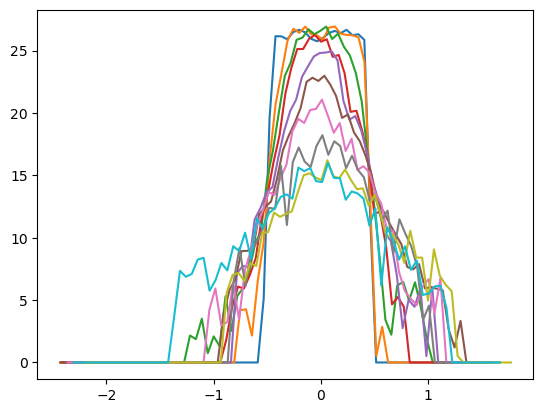

In [54]:
for i in range(10):
    plt.plot(dat[i,:,1]*5.52e-3,dat[i,:,0])

In [55]:
Q=np.zeros(10)
d=5.52e-5
for i in range(10):
    for j in range(dat[i,:,0].shape[0]):
        Q[i]+=np.pi*(np.abs(dat[i,j,1])*d*10*d)*rho*dat[i,j,0]
Q*=1e3
Q

array([2.29224744, 2.51192955, 3.74464465, 3.06524848, 3.48117377,
       4.42532033, 3.96432482, 3.434954  , 4.06372187, 5.30222602])

In [56]:
25*(0.5/100)**2*1.2*np.pi * 1e3

2.356194490192345

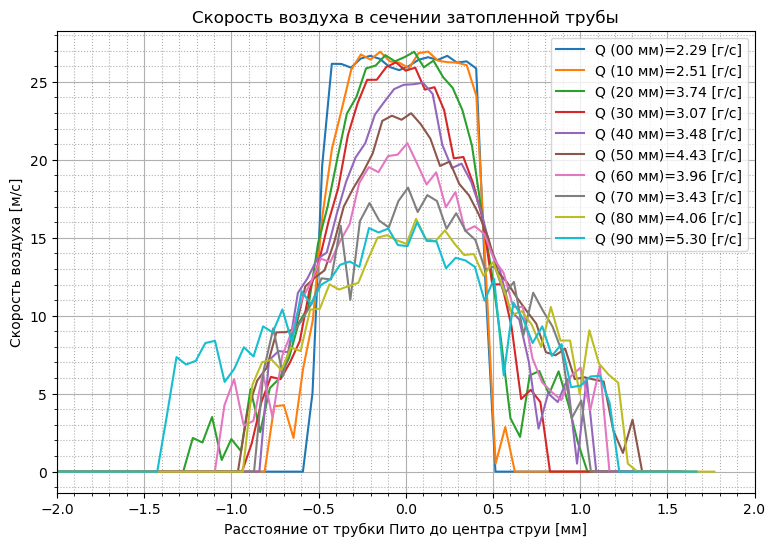

In [57]:
fig,ax=plt.subplots(figsize=(9,6))
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
ax.minorticks_on()
ax.set_xlim(-2,2)
ax.set_xlabel('Расстояние от трубки Пито до центра струи [мм]')
ax.set_ylabel('Скорость воздуха [м/c]')
ax.set_title('Скорость воздуха в сечении затопленной трубы')
for i in range(10):
    ax.plot(dat[i,:,1]*5.52e-3,dat[i,:,0], label=f'Q ({i}0 мм)={Q[i]:.2f} [г/c]')
ax.legend()
fig.savefig('final2.svg')